# Using Linear Regression to Predict Future Sales Revenue

Predicting the revenue for future months can be incredibly helpful when working with Sales teams. It assists with strategic planning, optimizing resources, setting realistic targets, and allows the company to make informed decision regarding budgets and sales strategies. Below, I utilize dummy sales data generated by ChatGPT to show an example of the sales prediction models I have built.

In [ ]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Import data from CSV

df = pd.read_csv('/content/Dummmy_Sales_Data - Sheet1.csv')

In [ ]:
df.head()

,Date,ProductA_Revenue,ProductB_Revenue,ProductC_Revenue
0,2018-01-01,10000,8000,12000
1,2018-02-01,11000,8800,13200
2,2018-03-01,12000,9600,14400
3,2018-04-01,13000,10400,15600
4,2018-05-01,14000,11200,16800


The data is grouped by specific days above, monthly sales data is more relevant for my use case so I will group by month and year.

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])

# Create column for month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month and year and sum the numeric columns
df_monthly_sum = df.groupby(['Year','Month']).sum().reset_index()

df_monthly_sum.head()

<ipython-input-36-92d9cb6e7b74>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly_sum = df.groupby(['Year','Month']).sum().reset_index()


,Year,Month,ProductA_Revenue,ProductB_Revenue,ProductC_Revenue
0,2018,1,10000,8000,12000
1,2018,2,11000,8800,13200
2,2018,3,12000,9600,14400
3,2018,4,13000,10400,15600
4,2018,5,14000,11200,16800


I would like to create the model for total revenue, rather than product specific. So I'll add another column showing the total revenue for each month.

In [ ]:
df['Total_Revenue'] = df['ProductA_Revenue'] + df['ProductB_Revenue'] + df['ProductC_Revenue']
df.head()

,Date,ProductA_Revenue,ProductB_Revenue,ProductC_Revenue,Month,Year,Total_Revenue
0,2018-01-01,10000,8000,12000,1,2018,30000
1,2018-02-01,11000,8800,13200,2,2018,33000
2,2018-03-01,12000,9600,14400,3,2018,36000
3,2018-04-01,13000,10400,15600,4,2018,39000
4,2018-05-01,14000,11200,16800,5,2018,42000


Now the data is ready to use for building the model.

In [ ]:
# Create features (X) and target variable (Y)
x = df[['Month', 'Year']]
y = df['Total_Revenue']

In [ ]:
# Split data into Training and Testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [ ]:
# Initialize and train the Linear Regression Model

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
predictions = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R=Squared: {r2}')

Mean Squared Error: 1078624.6356195675
R=Squared: 0.9997392861359838


The Mean Squared Error is quite large, but the R-squared is great. Let's get a visual of how well this model performed.

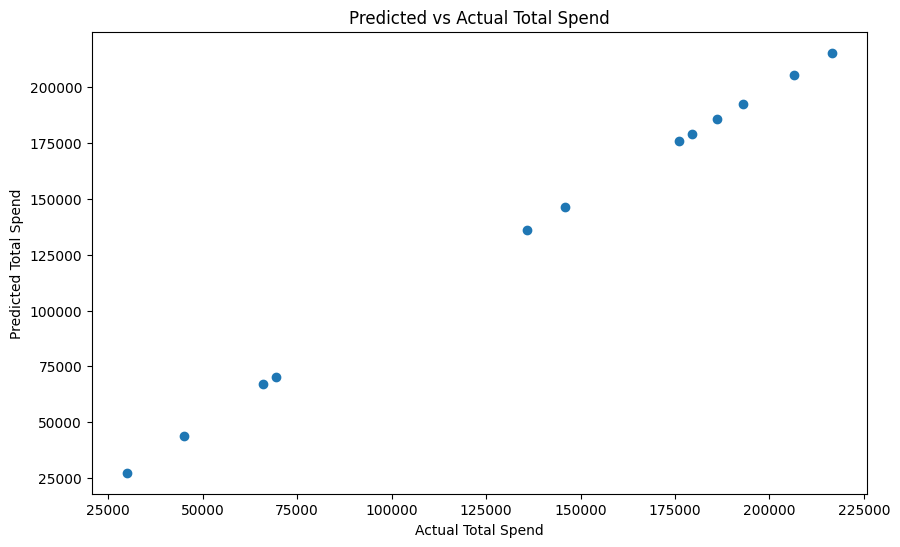

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.title('Predicted vs Actual Total Spend')
plt.xlabel('Actual Total Spend')
plt.ylabel('Predicted Total Spend')
plt.show()

Looks good! Now I will use that data to predict the following quarter's revenue using this model:

In [ ]:
# Create dataframe for future months
data = {
    'Month' : [1, 2, 3],
    'Year' : [2023, 2023, 2023]}

df_future = pd.DataFrame(data)
print(df_future)

   Month  Year
0      1  2023
1      2  2023
2      3  2023


In [ ]:
#Predict future months' revenue

future_predictions = model.predict(df_future[['Month', 'Year']])

df_future['PredictedTotalSpend'] = future_predictions

df_future

,Month,Year,PredictedTotalSpend
0,1,2023,225721.571317
1,2,2023,228997.462369
2,3,2023,232273.353421


Great, now I can tell Sales Leadership that we are expecting total revenue to be around $686k for Q1 2023.